In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

### Шаг 1. Откройте файл с данными и изучите общую информацию

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

В данной работе нам требуется:

1. изучить датасет
2. сделать предобработку(избавиться от дубликатов, пустных значений)
3. добавить новые столбцы.
4. провести исследовательский анализ данных.
5. проверить гипотезы
6. написать вывод.

In [2]:
try:
    games = pd.read_csv('games.csv', sep=',')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')

Для начала откроем датасет и разделим склеенные данные с помощью сепаратора.
Выведем первые 20 строк:

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Применим метод describe(), чтобы посмотреть где большие стандртные отклонения.

In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Даллее рименим метод info(), чтобы посмотреть общую информацию о датасете:

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод. Представленный датасет имеет информацию об играх. Следует обработать данные, избавиться от пропусков, дубликатов и привести столбцы к правильному типу. Также обработать аномальные значения.**

### Шаг 2. Подготовьте данные

#### Приведем столбцы к нижнему регистру:

In [6]:
games.columns = games.columns.str.lower()
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Проверка на дубликаты:

In [7]:
games.duplicated().unique()

array([False])

#### Преобразуйте данные в нужные типы.

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Глядя на таблицу, я думаю стоит перевести user_score в численный тип данных, чтобы проще было работать с этим столбцом. Так же перевести в целочисленный year_of_release после обработки пропусков.

In [9]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce') 

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


#### Обработка пропусков:

##### year_of_release

In [11]:
print(round((games['platform'].count() - games['year_of_release'].count()) * 100 / games['platform'].count(),2))

1.61


В столбце year_of_release всего 1.6% пропусков. Думаю можно удалить эти пустые значения, они не сильно повлияют на наш датасет.

In [12]:
games = games[games['year_of_release'].notna()]
games.shape[0]

16446

In [13]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


##### critic_score

In [15]:
games['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

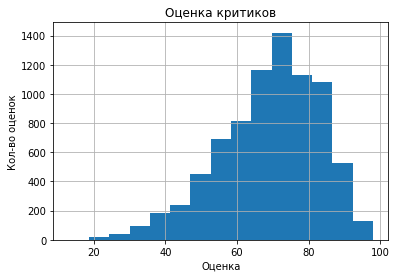

In [16]:
games['critic_score'].hist(bins=15);
plt.title('Оценка критиков')
plt.xlabel('Оценка')
plt.ylabel('Кол-во оценок')
plt.show()

##### user_score

In [17]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

#### Суммарные продажи:

In [18]:
games['sum_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**Вывод. Данные обработыны. Проработали пропуски, обновили типы, проверили на дубликаты. Вывели столбец с суммарной выручкой.**

### Шаг 3. Проведите исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы.

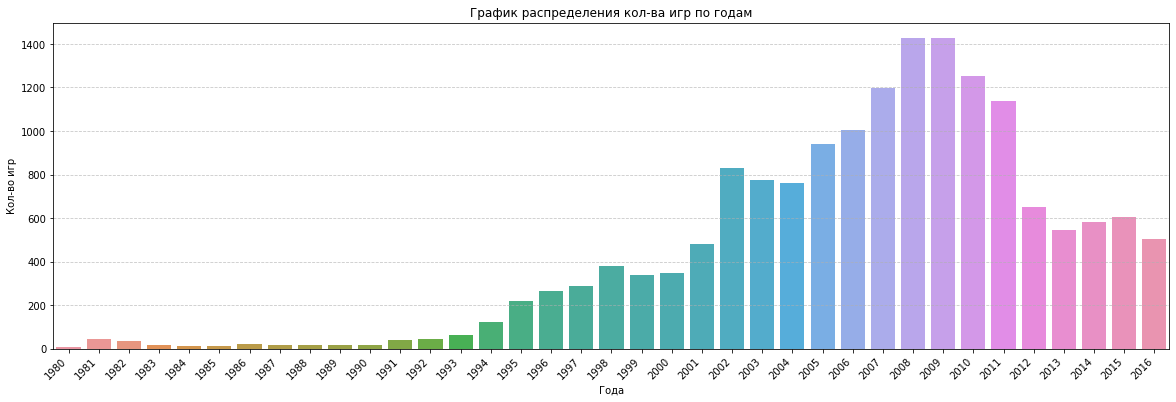

In [19]:
plt.figure(figsize=(20, 6))
sns.countplot(data=games, x='year_of_release', order=games['year_of_release'].value_counts().index.sort_values())
plt.title('График распределения кол-ва игр по годам')
plt.xlabel('Года')
plt.ylabel('Кол-во игр')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Судя по графику, основной рост выпуска игр начался в 1993 году, поэтому можно сказать, что данные до 1993 не сильно важны.

#### Посмотрите, как менялись продажи по платформам. 

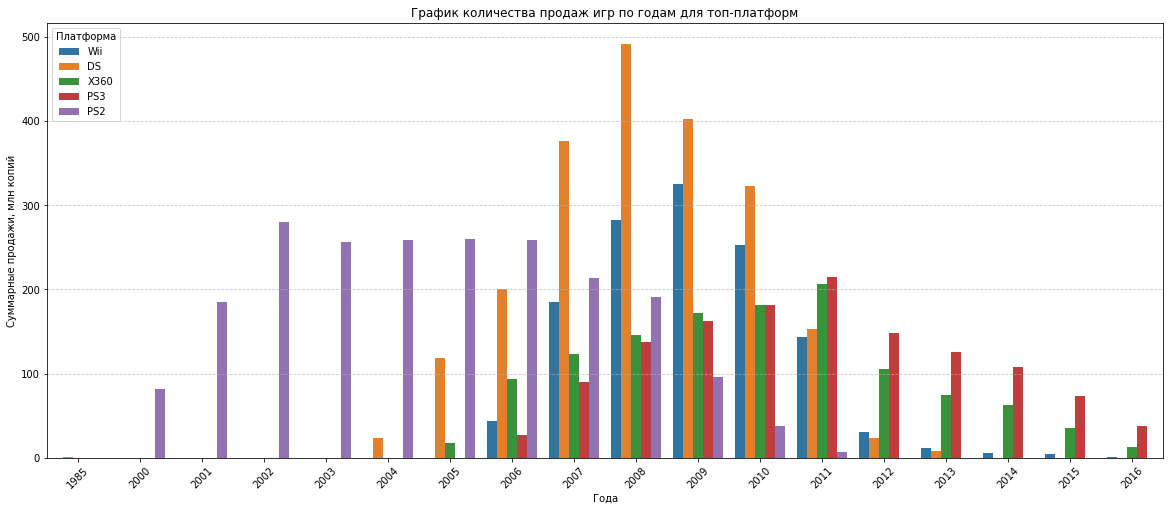

In [20]:
top_platforms = games.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).index[:5]
top_platforms_sales = games.query('platform in @top_platforms')

plt.figure(figsize=(20, 8))
sns.countplot(data=top_platforms_sales, x='year_of_release', hue='platform')
plt.title('График количества продаж игр по годам для топ-платформ')
plt.xlabel('Года')
plt.ylabel('Суммарные продажи, млн копий')
plt.legend(title='Платформа', loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Судя по графику можно сказать, что каждая платформа примерно существует 10 лет, потом выходит более технологичная и заменяет ее.

#### Возьмите данные за соответствующий актуальный период.

Я считаю, пердиод с 2013 года будет достаточно для определения прогноза на 2017 год.

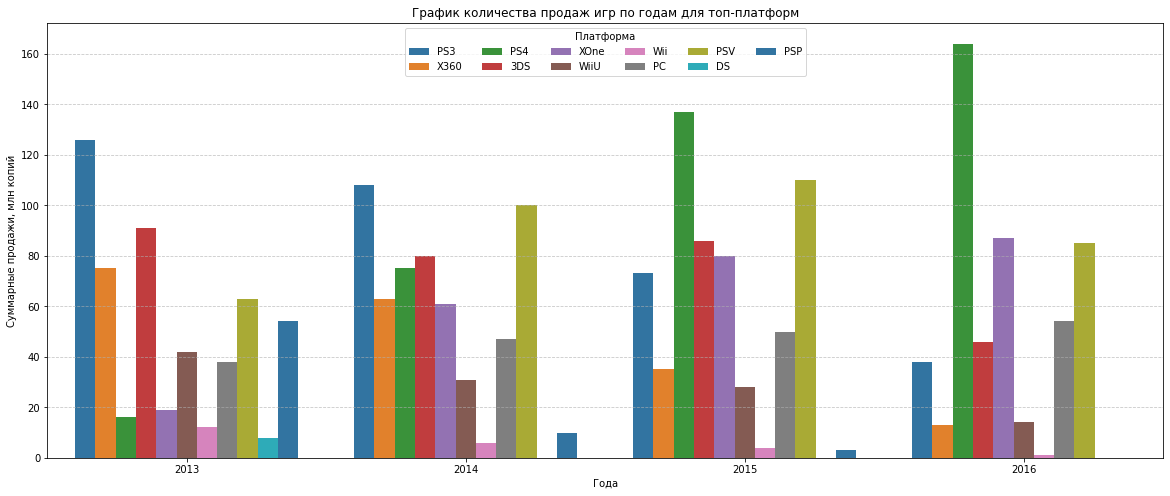

In [21]:
current_period = games.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).index
current_period_filtered = games.query('platform in @current_period and year_of_release >= 2013')

dark_palette = sns.color_palette()
plt.figure(figsize=(20, 8))
sns.countplot(data=current_period_filtered, x='year_of_release', hue='platform', palette=dark_palette)
plt.title('График количества продаж игр по годам для топ-платформ')
plt.xlabel('Года')
plt.ylabel('Суммарные продажи, млн копий')
plt.legend(title='Платформа', loc='upper center', ncol=6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Судя по графику, набирают популярность платформы PS4, XOne и PС. Они и будут прибыльны в будущем году. Потеряли популярность PS3, X360, Wii.

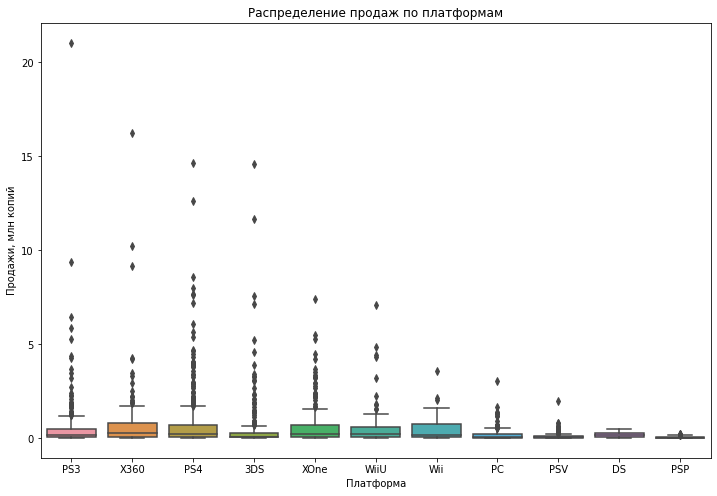

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=current_period_filtered, x='platform', y='sum_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.show()

Описывая боксплот можно увидить самые популярные платформы.

#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

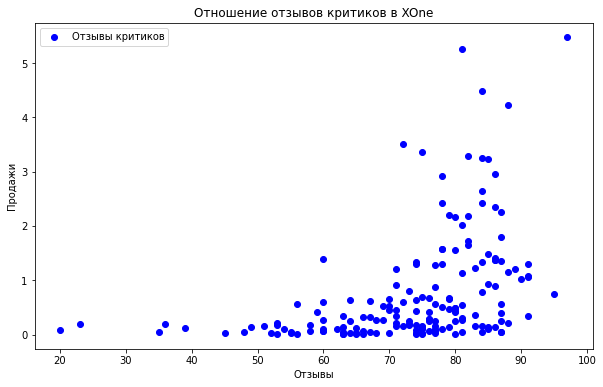

Корреляция между оценкой критиков и продажами: 0.4169983280084017


In [23]:
popular_platform_data = games.query('platform == "XOne"') 

plt.figure(figsize=(10, 6))
plt.scatter(popular_platform_data['critic_score'], popular_platform_data['sum_sales'], color='blue', label='Отзывы критиков')
plt.title('Отношение отзывов критиков в XOne')
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.legend()
plt.show()

correlation_critic = popular_platform_data['critic_score'].corr(popular_platform_data['sum_sales'])

print("Корреляция между оценкой критиков и продажами:", correlation_critic)


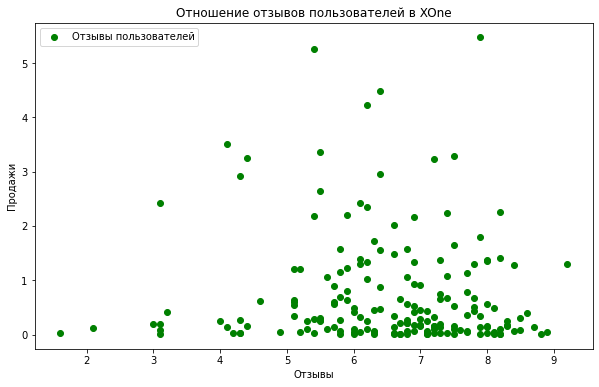

Корреляция между оценкой пользователей и продажами: -0.06892505328279414


In [24]:
popular_platform_data = games.query('platform == "XOne"') 

plt.figure(figsize=(10, 6))
plt.scatter(popular_platform_data['user_score'], popular_platform_data['sum_sales'], color='green', label='Отзывы пользователей')
plt.title('Отношение отзывов пользователей в XOne')
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.legend()
plt.show()

correlation_user = popular_platform_data['user_score'].corr(popular_platform_data['sum_sales'])

print("Корреляция между оценкой пользователей и продажами:", correlation_user)

Судя по графику и корреляции оценки влияют на продажи, они увеличиваются. Оценки критиков в большей степени, чем оценки пользователей.

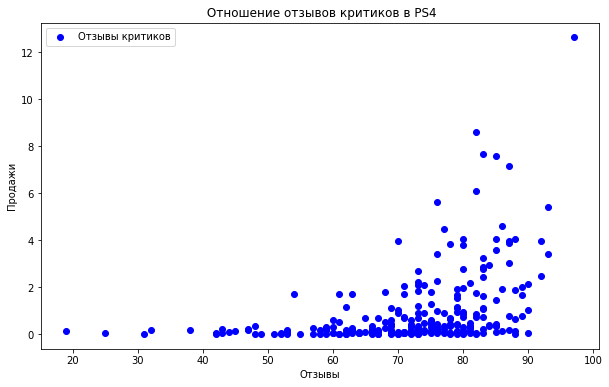

Корреляция между оценкой критиков и продажами: 0.40656790206178095


In [25]:
popular_platform_data = games.query('platform == "PS4"') 

plt.figure(figsize=(10, 6))
plt.scatter(popular_platform_data['critic_score'], popular_platform_data['sum_sales'], color='blue', label='Отзывы критиков')
plt.title(' Отношение отзывов критиков в PS4')
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.legend()
plt.show()

correlation_critic = popular_platform_data['critic_score'].corr(popular_platform_data['sum_sales'])

print("Корреляция между оценкой критиков и продажами:", correlation_critic)

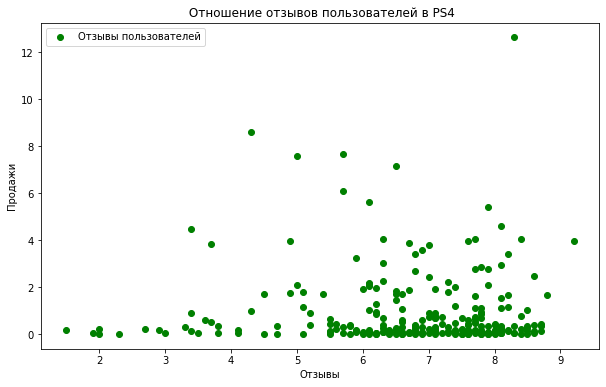

Корреляция между оценкой пользователей и продажами: -0.031957110204556376


In [26]:
popular_platform_data = games.query('platform == "PS4"') 

plt.figure(figsize=(10, 6))
plt.scatter(popular_platform_data['user_score'], popular_platform_data['sum_sales'], color='green', label='Отзывы пользователей')
plt.title(' Отношение отзывов пользователей в PS4')
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.legend()
plt.show()

correlation_user = popular_platform_data['user_score'].corr(popular_platform_data['sum_sales'])

print("Корреляция между оценкой пользователей и продажами:", correlation_user)

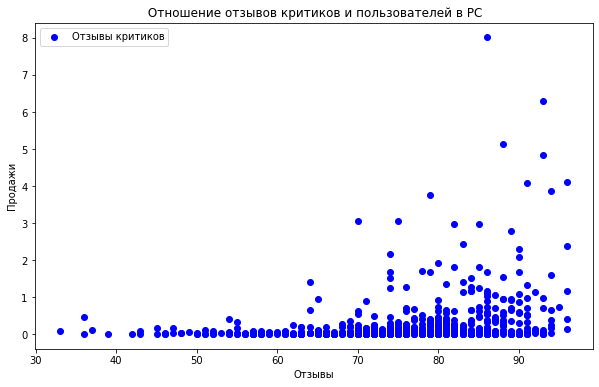

Корреляция между оценкой критиков и продажами: 0.257394718400985


In [27]:
popular_platform_data = games.query('platform == "PC"') 

plt.figure(figsize=(10, 6))
plt.scatter(popular_platform_data['critic_score'], popular_platform_data['sum_sales'], color='blue', label='Отзывы критиков')
plt.title(' Отношение отзывов критиков и пользователей в PC')
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.legend()
plt.show()

correlation_critic = popular_platform_data['critic_score'].corr(popular_platform_data['sum_sales'])

print("Корреляция между оценкой критиков и продажами:", correlation_critic)

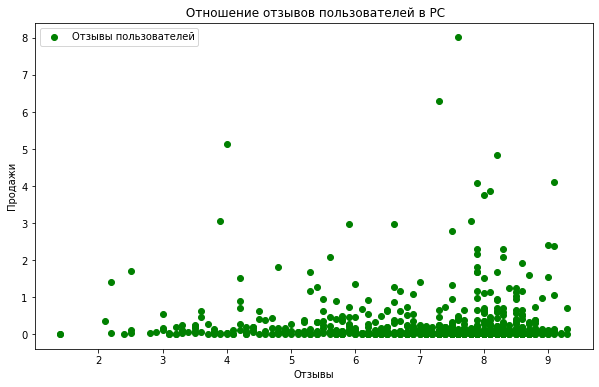

Корреляция между оценкой пользователей и продажами: 0.012904741611451175


In [28]:
popular_platform_data = games.query('platform == "PC"') 

plt.figure(figsize=(10, 6))
plt.scatter(popular_platform_data['user_score'], popular_platform_data['sum_sales'], color='green', label='Отзывы пользователей')
plt.title(' Отношение отзывов пользователей в PC')
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.legend()
plt.show()

correlation_user = popular_platform_data['user_score'].corr(popular_platform_data['sum_sales'])

print("Корреляция между оценкой пользователей и продажами:", correlation_user)

Аналогичная ситуация прослеживается и на других платформах. Оценки критиков положительно влияют на продажи, оценки пользователей в меньшей степени.

#### Распределение игр по жанрам

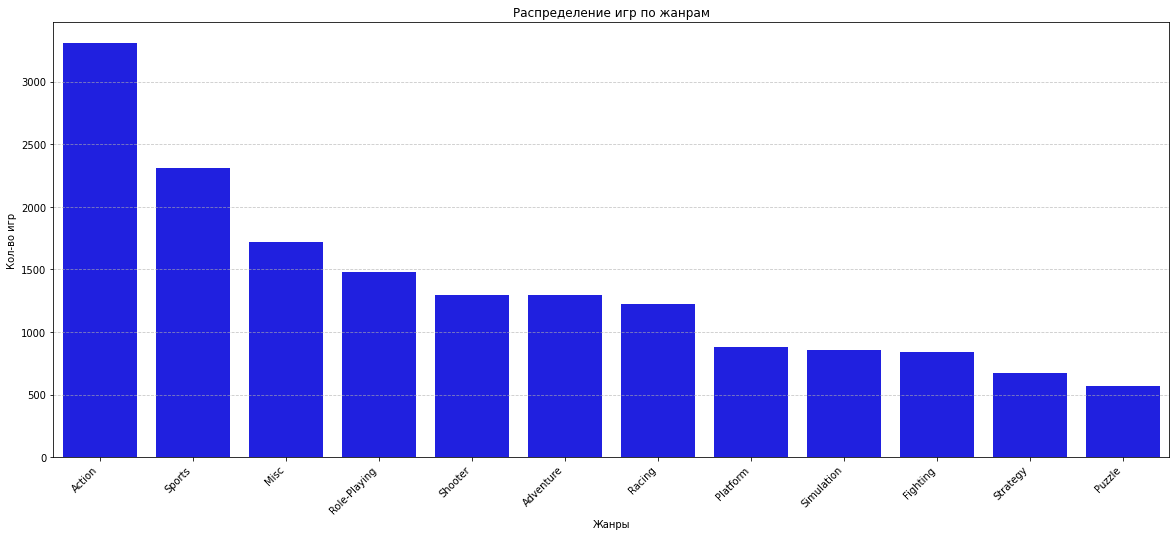

In [29]:
genre_counts = games['genre'].value_counts()

plt.figure(figsize=(20, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color='blue')
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Кол-во игр')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


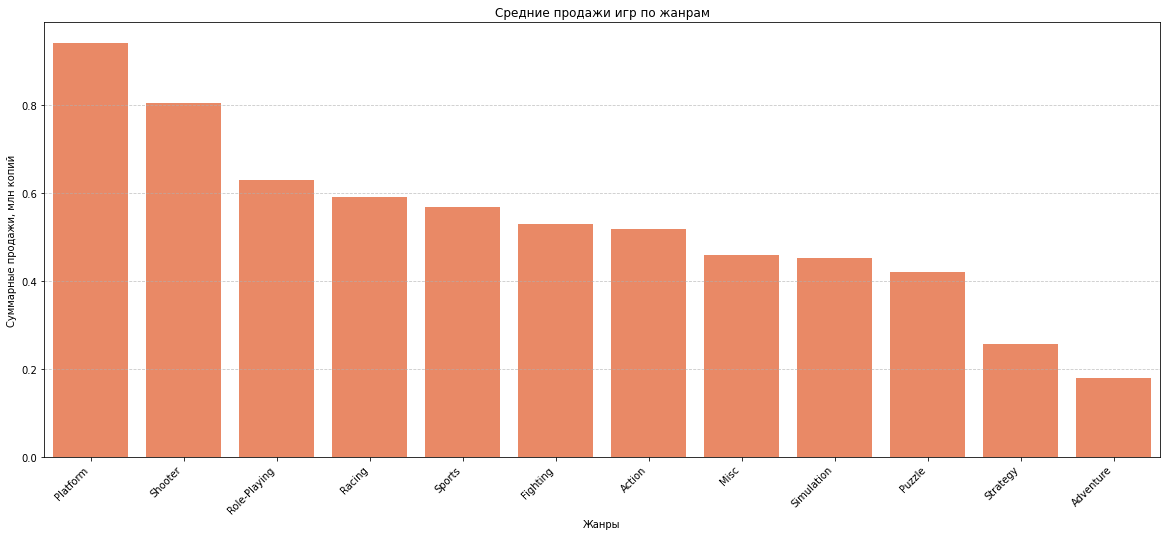

In [30]:
genre_sales = games.groupby('genre')['sum_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=genre_sales.index, y=genre_sales.values, color='coral')
plt.title('Средние продажи игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи, млн копий')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

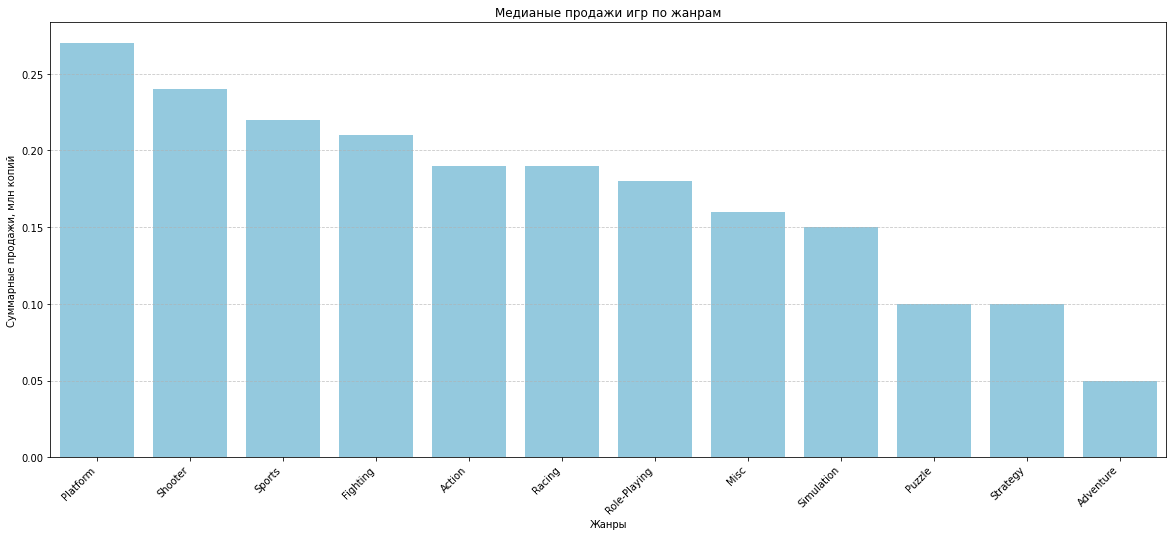

In [31]:
genre_sales = games.groupby('genre')['sum_sales'].median().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=genre_sales.index, y=genre_sales.values, color='skyblue')
plt.title('Медианые продажи игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи, млн копий')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Самыми прибыльными жанрами являются action, sports. Они и выпускаются в самом большом тираже. Strategy и adventure самые не прибыльные.

**Вывод. Провели исследовательский анализ данных и определили:**
1. Рост популярности игр начался в 1993
2. В среднем платформа "живет" 10 лет
3. Набирают популярность платформы PS4, XOne и PС. Они и будут прибыльны в 2017. Потеряли популярность PS3, X360, Wii.
4. Оценки критиков положительно влияют на продажи, оценки пользователей в меньшей степени.
5. Самыми прибыльными жанрами являются platform, shooter. Они и выпускаются в самом большом тираже. Strategy и adventure самые не прибыльные.

### Шаг 4. Составьте портрет пользователя каждого региона

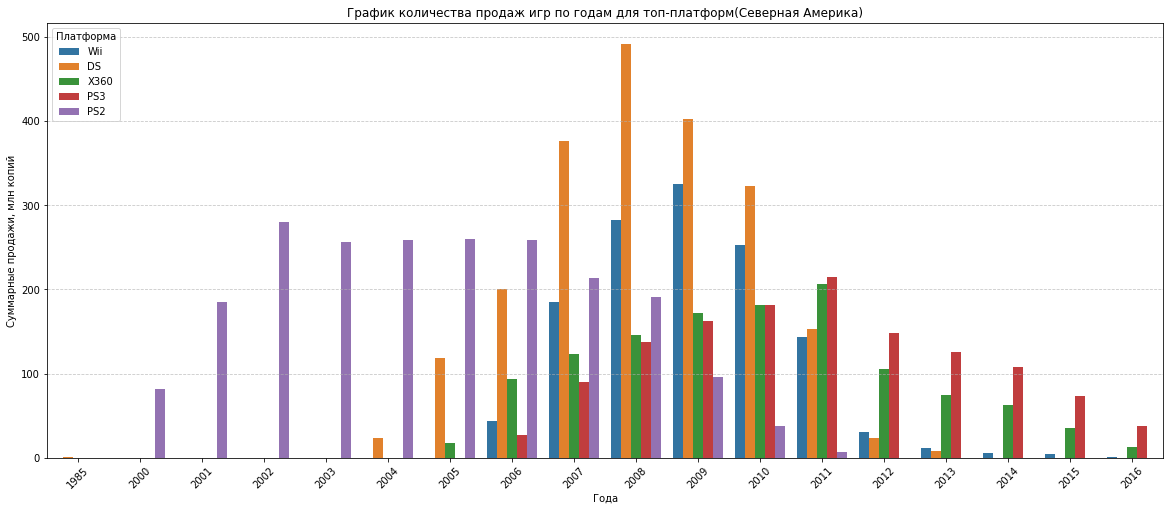

In [32]:
top_platforms_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).index[:5]
top_platforms_na_sales = games.query('platform in @top_platforms_na')

plt.figure(figsize=(20, 8))
sns.countplot(data=top_platforms_na_sales, x='year_of_release', hue='platform')
plt.title('График количества продаж игр по годам для топ-платформ(Северная Америка)')
plt.xlabel('Года')
plt.ylabel('Суммарные продажи, млн копий')
plt.legend(title='Платформа', loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

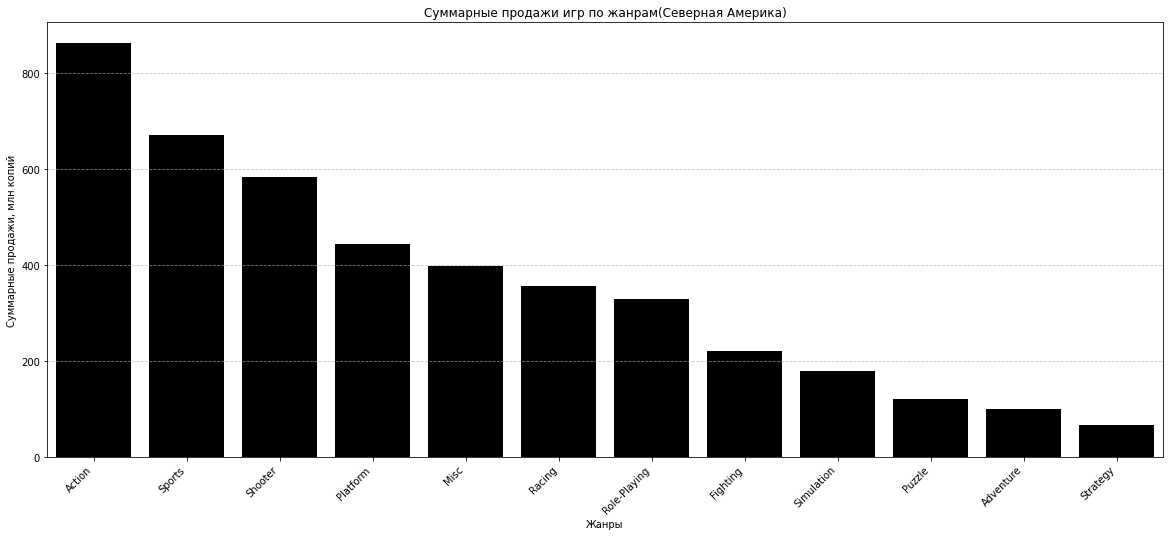

In [33]:
genre_sales_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=genre_sales_na.index, y=genre_sales_na.values, color='black')
plt.title('Суммарные продажи игр по жанрам(Северная Америка)')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи, млн копий')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

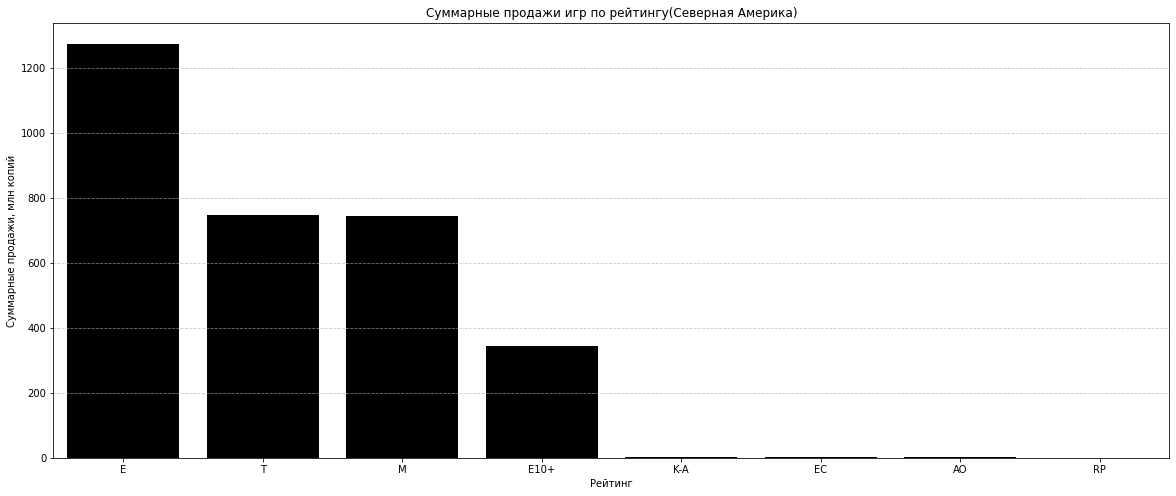

In [34]:
genre_sales_na = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=genre_sales_na.index, y=genre_sales_na.values, color='black')
plt.title('Суммарные продажи игр по рейтингу(Северная Америка)')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарные продажи, млн копий')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

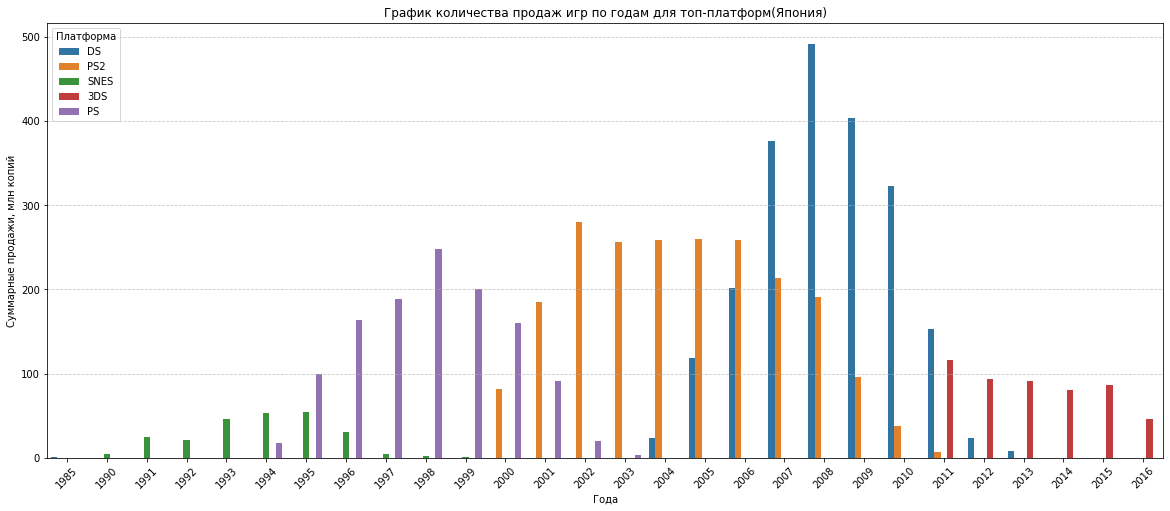

In [35]:
top_platforms_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).index[:5]
top_platforms_jp_sales = games.query('platform in @top_platforms_jp')

plt.figure(figsize=(20, 8))
sns.countplot(data=top_platforms_jp_sales, x='year_of_release', hue='platform')
plt.title('График количества продаж игр по годам для топ-платформ(Япония)')
plt.xlabel('Года')
plt.ylabel('Суммарные продажи, млн копий')
plt.legend(title='Платформа', loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

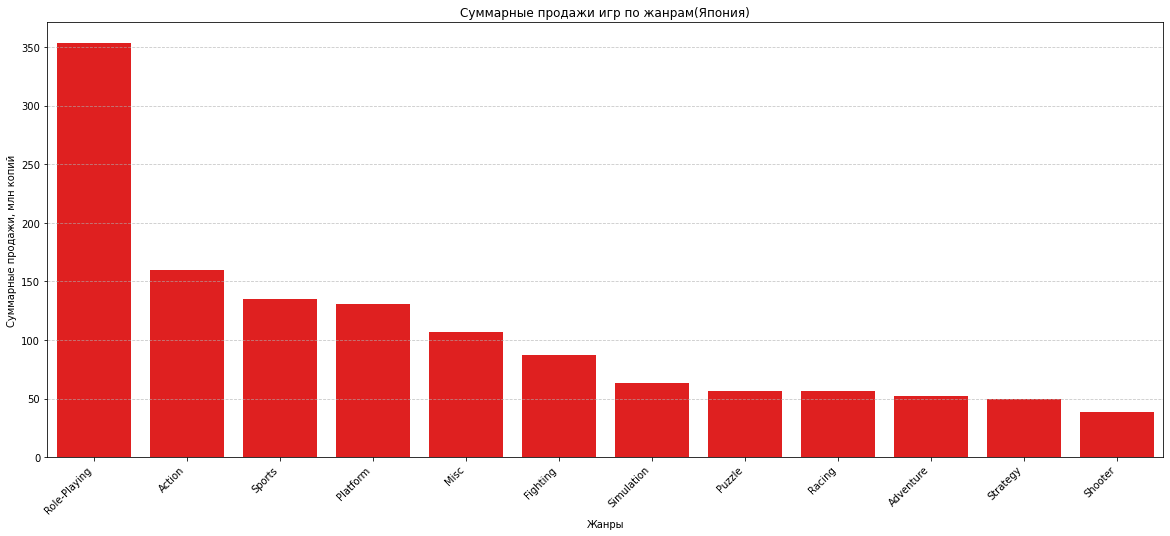

In [36]:
genre_sales_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=genre_sales_jp.index, y=genre_sales_jp.values, color='red')
plt.title('Суммарные продажи игр по жанрам(Япония)')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи, млн копий')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

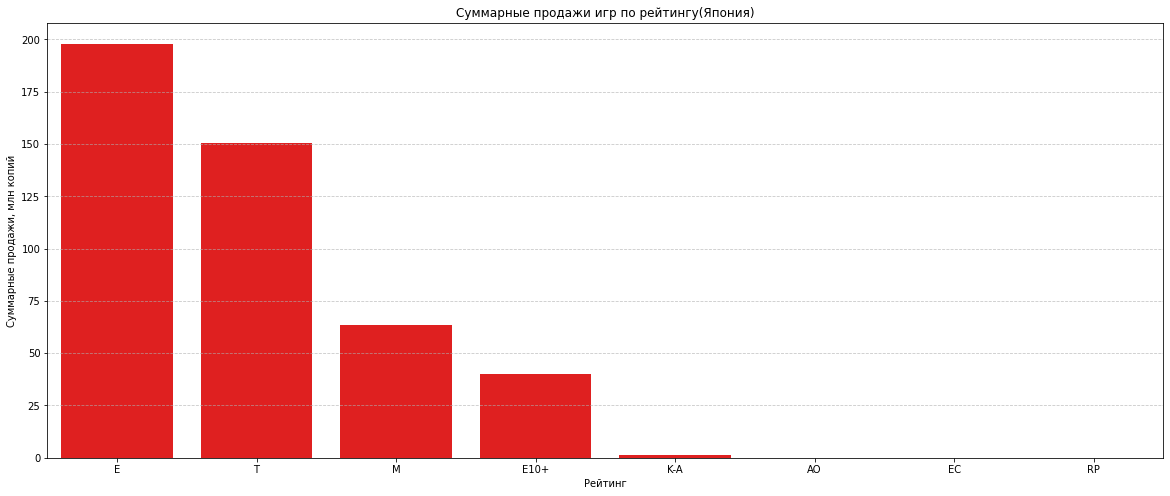

In [37]:
genre_sales_jp = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=genre_sales_jp.index, y=genre_sales_jp.values, color='red')
plt.title('Суммарные продажи игр по рейтингу(Япония)')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарные продажи, млн копий')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

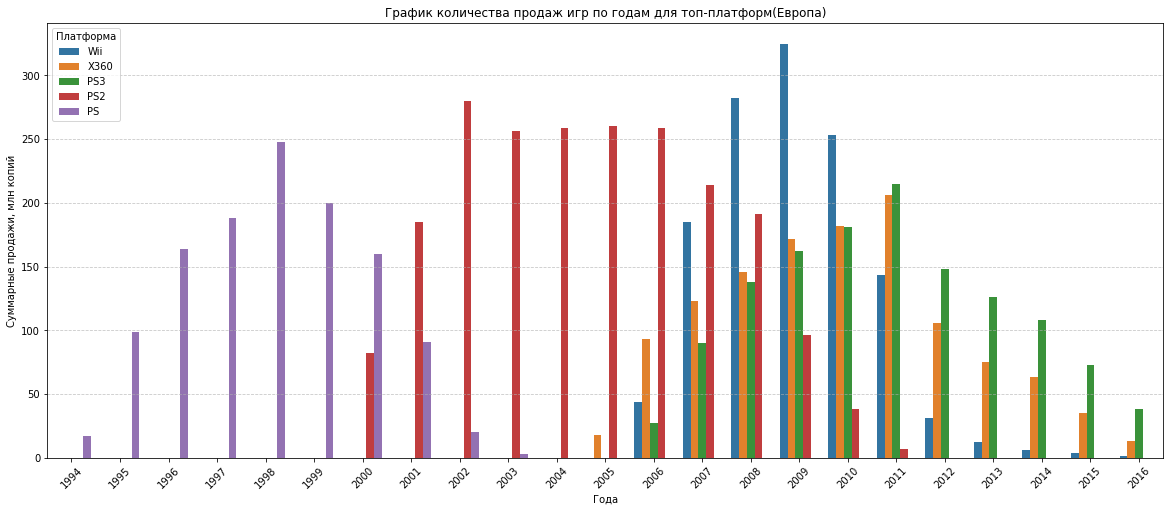

In [38]:
top_platforms_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).index[:5]
top_platforms_eu_sales = games.query('platform in @top_platforms_eu')

plt.figure(figsize=(20, 8))
sns.countplot(data=top_platforms_eu_sales, x='year_of_release', hue='platform')
plt.title('График количества продаж игр по годам для топ-платформ(Европа)')
plt.xlabel('Года')
plt.ylabel('Суммарные продажи, млн копий')
plt.legend(title='Платформа', loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

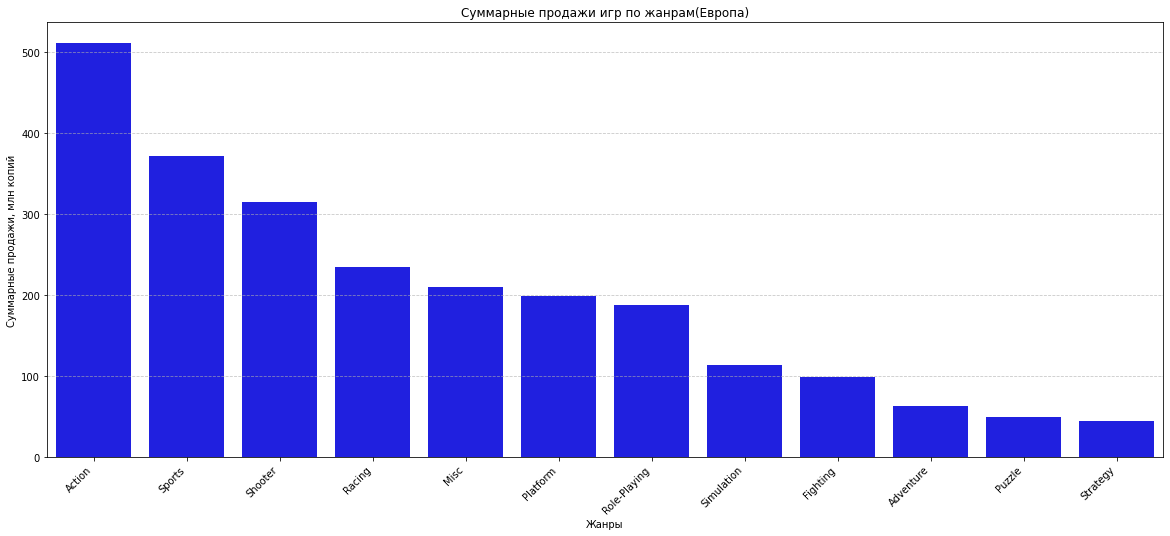

In [39]:
genre_sales_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=genre_sales_eu.index, y=genre_sales_eu.values, color='blue')
plt.title('Суммарные продажи игр по жанрам(Европа)')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи, млн копий')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

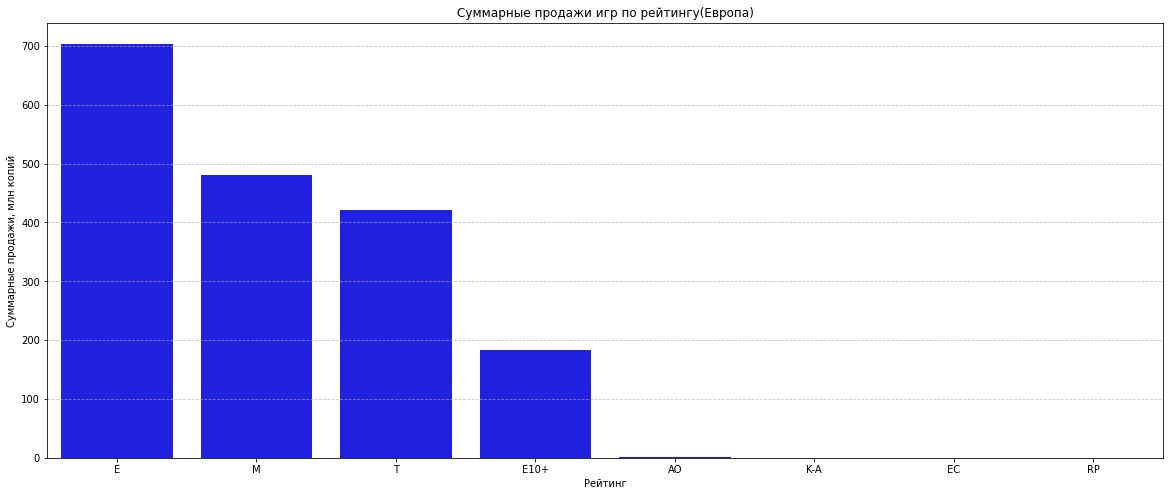

In [40]:
genre_sales_eu = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=genre_sales_eu.index, y=genre_sales_eu.values, color='blue')
plt.title('Суммарные продажи игр по рейтингу(Европа)')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарные продажи, млн копий')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. **В Северной Америке преобладали 5 платформ: Wii, DS, X360, PS3, PS2. В Японии DS, PS2, SNES, 3DS, PS. В Европе Wii, X360, PS3, PS2, PS. Вероятно разница зависит от самой платформы. К примеру xbox американская приставка, а ps и ds японские. Хотя отслеживается одна присатвка, ps2, которая поравилась всем пользователям во всем мире, везде регистрируются большие продажи по ней.**
2. **В жанрах наблюдается схожесть у Америки и Европы, из за похожей культуры. В Японии наблюдается любовь к ролевым играм.** 
3. **По поводу рейтинга можно сказать, что в основном продается E(«E» («Everyone») — «Для всех»), но есть различия между Америкой/Европой и Японией. В Японии второй по продажам рейтинг Т(«T» («Teen») — «Подросткам»). Вероятно подростки играют важную роль в игровой идустрии Японии. Однако в западных странах рейтинг М(«M» («Mature») — «Для взрослых») второй по значимости. Видимо взрослые больше играют в игры на западе, так же жанры action и shooter предполагают насилие(популярны в странах запада), поэтому такие различия между регионами.**

### Шаг 5. Проверьте гипотезы

#### Проверка гипотезы о том , что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

1. H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [41]:
ratings_xbox_one = games[(games['platform'] == 'XOne') & (games['user_score'].notnull())]['user_score']
ratings_pc = games[(games['platform'] == 'PC') & (games['user_score'].notnull())]['user_score']

alpha = 0.05 
result = st.ttest_ind(ratings_xbox_one, ratings_pc)

print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются.


**Вывод. Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются.**

#### Проверка гипотезы о том , что средние пользовательские рейтинги жанров Action и Sports разные.;

1. H0: Средние пользовательские рейтинги жанров Action и Sports различаются.
2. H1: Средние пользовательские рейтинги жанров Action и Sports одинаковы.

In [42]:
ratings_action = games[(games['genre'] == 'Action') & (games['user_score'].notnull())]['user_score']
ratings_sports = games[(games['genre'] == 'Sports') & (games['user_score'].notnull())]['user_score']

alpha = 0.05
result = st.ttest_ind(ratings_action, ratings_sports) 

print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковы.")
else:
    print("Не отвергаем нулевую гипотезу:Средние пользовательские рейтинги жанров Action и Sports различаются.")

p-значение: 0.06480928064420527
Не отвергаем нулевую гипотезу:Средние пользовательские рейтинги жанров Action и Sports различаются.


**Вывод. Не отвергаем нулевую гипотезу:Средние пользовательские рейтинги жанров Action и Sports различаются.**

### Шаг 6. Напишите общий вывод

**В данном исследовании влияние различных факторов на успешность игры.**

#### В первом пунке мы провели обзор датасета и определили, что он нуждается в обработке от дубликатов, пустых и аномальных значений.

#### Во втором пункте мы избавлялись от ошибок в датасете, с чем успешно справились:
1. привели столбецы к нижнему регистру
2. привели столбцы к нужным типам
3. проверили на дубликаты
4. обработали пропуски

#### В третьем пункте провели анализ данных:
1. рост популярности игр начался в 1993
2. в среднем платформа "живет" 10 лет
3. набирают популярность платформы PS4, XOne и PС. Они и будут прибыльны в 2017. Потеряли популярность PS3, X360, Wii.
4. оценки критиков положительно влияют на продажи, оценки пользователей в меньшей степени.
5. самыми прибыльными жанрами являются platform, shooter. Они и выпускаются в самом большом тираже. Strategy и adventure самые не прибыльные.

#### В четвертом пункте составили портрет пользователя каждого региона:
1. в Северной Америке преобладали 5 платформ: Wii, DS, X360, PS3, PS2. В Японии DS, PS2, SNES, 3DS, PS. В Европе Wii, X360, PS3, PS2, PS. Вероятно разница зависит от самой платформы. К примеру xbox американская приставка, а ps и ds японские. Хотя отслеживается одна присатвка, ps2, которая поравилась всем пользователям во всем мире, везде регистрируются большие продажи по ней.
2. в жанрах наблюдается схожесть у Америки и Европы, из за похожей культуры. В Японии наблюдается любовь к ролевым играм. 
3. по поводу рейтинга можно сказать, что в основном продается E(«E» («Everyone») — «Для всех»), но есть различия между Америкой/Европой и Японией. В Японии второй по продажам рейтинг Т(«T» («Teen») — «Подросткам»). Вероятно подростки играют важную роль в игровой идустрии Японии. Однако в западных странах рейтинг М(«M» («Mature») — «Для взрослых») второй по значимости. Видимо взрослые больше играют в игры на западе, так же жанры action и shooter предполагают насилие(популярны в странах запада), поэтому такие различия между регионами.

#### В пятом пункте занимались непосредственно проверкой гипотез:
1. средние пользовательские рейтинги платформ Xbox One и PC различаются.
2. Средние пользовательские рейтинги жанров Action и Sports различаются.